In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [68]:
file = "accelerated_motion_results.csv"
df = pd.read_csv(file)

def load_state(file_name):
    """Utility function to load PSO Object

    :param file_name: .pkl file where PSO Object is saved
    :type file_name: str
    :return: pso object
    :rtype: PSO
    """
    import dill
    return dill.load(open(file_name, "rb"))

In [64]:
pso_3 = load_state("pso_3.pkl")
pso_5 = load_state("pso_5.pkl")
pso_10 = load_state("pso_10.pkl")
pso_20 = load_state("pso_20.pkl")
pso_50 = load_state("pso_50.pkl")
pso_100 = load_state("pso_100.pkl")
psoS = [pso_3, pso_5, pso_10, pso_20, pso_50, pso_100]
particles = [3, 5, 10, 20, 50, 100]
epochs = np.arange(1, len(pso_3.fit_history)+1)

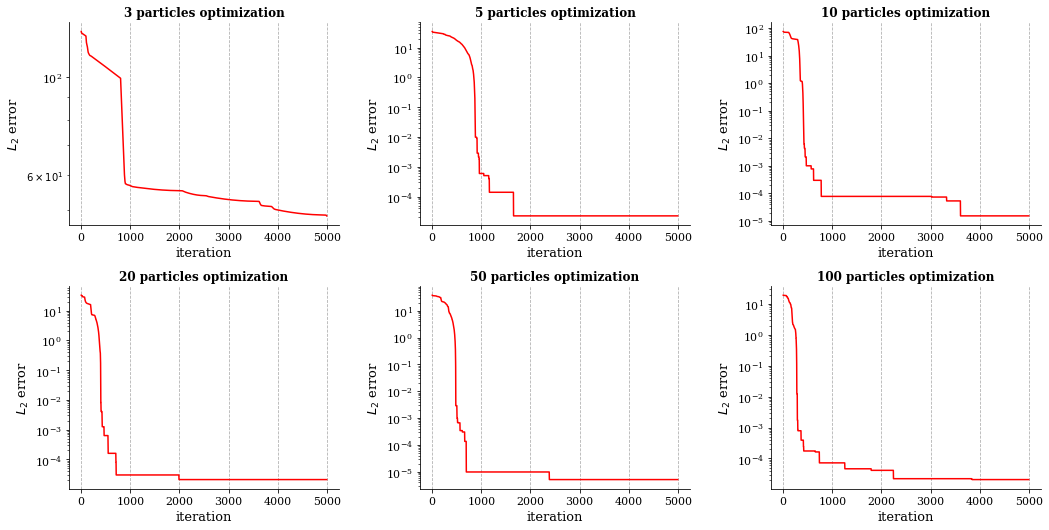

In [66]:
fig, axes = plt.subplots(figsize=(15, 8), nrows=2, ncols=3)
axes = axes.ravel()

for i, pso in enumerate(psoS):
    axes[i].semilogy(epochs, pso.fit_history, linewidth=1.5, color='red')
    axes[i].grid(which='major', axis='x', linestyle='--')
    axes[i].set_title("{} particles optimization".format(particles[i]), fontfamily='serif',
                      fontsize=12, fontweight='bold')
    for s in ['top', 'right']:
        axes[i].spines[s].set_visible(False)
    
    for label in axes[i].get_xticklabels():
        label.set_fontproperties('serif')
    
    for label in axes[i].get_yticklabels():
        label.set_fontproperties('serif')
        
    axes[i].tick_params(axis='both', which='major', labelsize=11)
    axes[i].set_xlabel("iteration", fontfamily='serif', fontsize=13)
    axes[i].set_ylabel("$L_2$ error", fontfamily='serif', fontsize=13)
    
plt.subplots_adjust(left=0.1,
                    bottom=0.0,
                    right=1,
                    top=0.81,
                    wspace=0.3,
                    hspace=0.3)
plt.show()

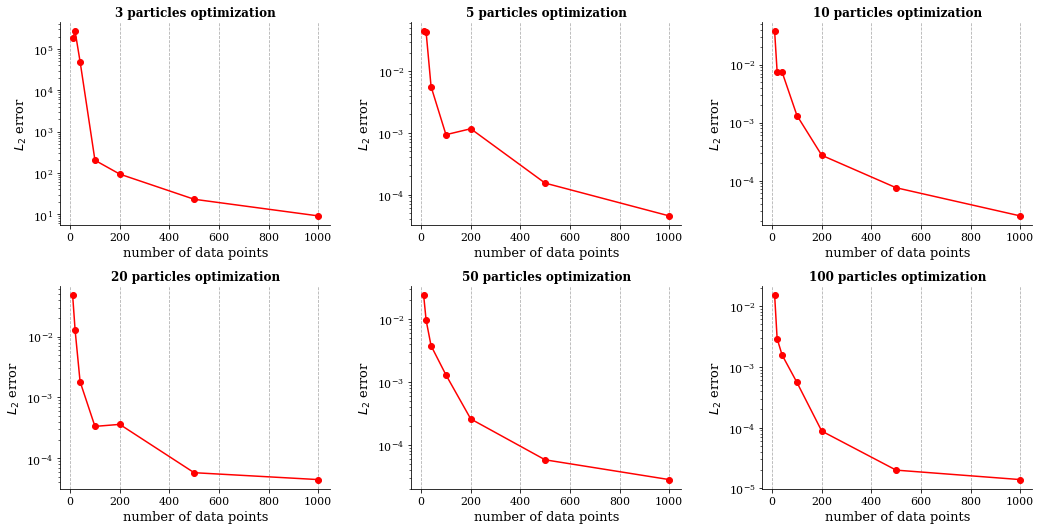

In [69]:
fig, axes = plt.subplots(figsize=(15, 8), nrows=2, ncols=3)
axes = axes.ravel()

for i, pso in enumerate(psoS):
    tmp = pd.DataFrame(df[df["n_particles"]==particles[i]])
    axes[i].semilogy(tmp[" n_points"], tmp[" error"], linewidth=1.5, color='red', marker='o')
    axes[i].grid(which='major', axis='x', linestyle='--')
    axes[i].set_title("{} particles optimization".format(particles[i]), fontfamily='serif',
                      fontsize=12, fontweight='bold')
    for s in ['top', 'right']:
        axes[i].spines[s].set_visible(False)
    
    for label in axes[i].get_xticklabels():
        label.set_fontproperties('serif')
    
    for label in axes[i].get_yticklabels():
        label.set_fontproperties('serif')
        
    axes[i].tick_params(axis='both', which='major', labelsize=11)
    axes[i].set_xlabel("number of data points", fontfamily='serif', fontsize=13)
    axes[i].set_ylabel("$L_2$ error", fontfamily='serif', fontsize=13)
    
plt.subplots_adjust(left=0.1,
                    bottom=0.0,
                    right=1,
                    top=0.81,
                    wspace=0.3,
                    hspace=0.3)
plt.savefig("plot2.pdf", bbox_inches='tight')